In [1]:
import os
import sys

# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Assume the project root is one level up from the notebooks directory
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the project root to Python's system path
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Added '{project_root}' to sys.path.")
print(f"Current working directory: {notebook_dir}")

# You might also want to change the working directory to the project root for easier path management
# %cd {project_root} # Uncomment this if you want notebook's working directory to be project root

Added '/Users/patriciawatanabe/Projects/RA_classification_CNN' to sys.path.
Current working directory: /Users/patriciawatanabe/Projects/RA_classification_CNN/notebooks


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())
# Optionally import seaborn for nicer plots
import seaborn as sns
import tensorflow as tf

/Users/patriciawatanabe/Projects/RA_classification_CNN/notebooks


In [3]:
# Assuming you are in the project root or adjust path accordingly
from src.config_transfer import MODELS_DIR, HISTORY_NAME, MODEL_NAME
# If not importing config_transfer, manually define paths:
MODELS_DIR = 'models' # Or the full path if running from outside project root
HISTORY_NAME = 'training_history_transfer.csv'
MODEL_NAME = 'ra_classifier_transfer_cnn.h5' # For confusion matrix

history_file_path = os.path.join('..', 'models', 'training_history_transfer.csv')
model_file_path = os.path.join('..', 'models', 'ra_classifier_transfer_cnn.h5') # <--- ADJUSTED PATH

best_model = tf.keras.models.load_model(model_file_path)


In [5]:
# Load the training history from the CSV file
history_df = pd.read_csv(history_file_path)
print(history_df.head()) # See the first few rows

       loss  accuracy  precision    recall   auc_roc  val_loss  val_accuracy  \
0  0.543088  0.717955   0.728261  0.695381  0.801356  0.682787      0.536685   
1  0.398422  0.820446   0.824423  0.815026  0.900800  0.619103      0.722826   
2  0.341913  0.852102   0.860181  0.840519  0.927738  0.591432      0.732337   
3  0.314166  0.862221   0.868074  0.854102  0.939275  0.452474      0.805707   
4  0.279875  0.881162   0.880249  0.882078  0.952372  0.491224      0.754076   

   val_precision  val_recall  val_auc_roc      lr  
0       0.340909    0.746269     0.582545  0.0001  
1       0.000000    0.000000     0.576469  0.0001  
2       0.500000    0.010152     0.556803  0.0001  
3       0.786408    0.400990     0.856273  0.0001  
4       0.818182    0.133663     0.810287  0.0001  


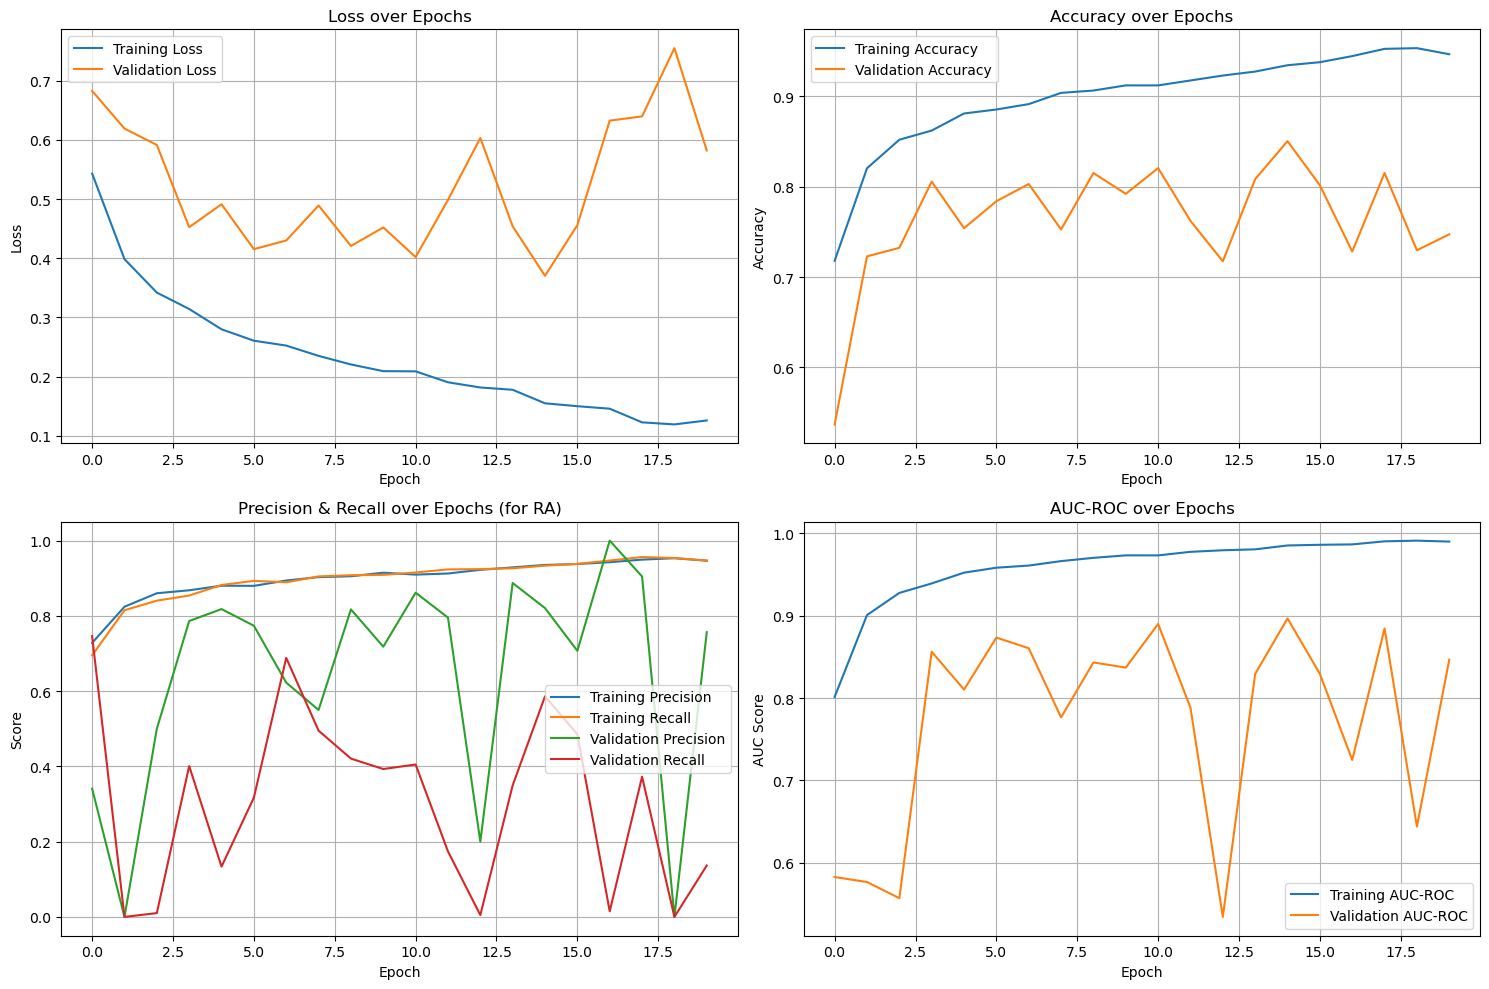

In [9]:
plt.figure(figsize=(15, 10))

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(2, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Precision and Recall
plt.subplot(2, 2, 3)
plt.plot(history_df['precision'], label='Training Precision')
plt.plot(history_df['recall'], label='Training Recall')
plt.plot(history_df['val_precision'], label='Validation Precision')
plt.plot(history_df['val_recall'], label='Validation Recall')
plt.title('Precision & Recall over Epochs (for RA)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Plot AUC-ROC
plt.subplot(2, 2, 4)
plt.plot(history_df['auc_roc'], label='Training AUC-ROC')
plt.plot(history_df['val_auc_roc'], label='Validation AUC-ROC')
plt.title('AUC-ROC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Display the plots
# plt.savefig(os.path.join(MODELS_DIR, 'training_curves.png')) # Save the plots

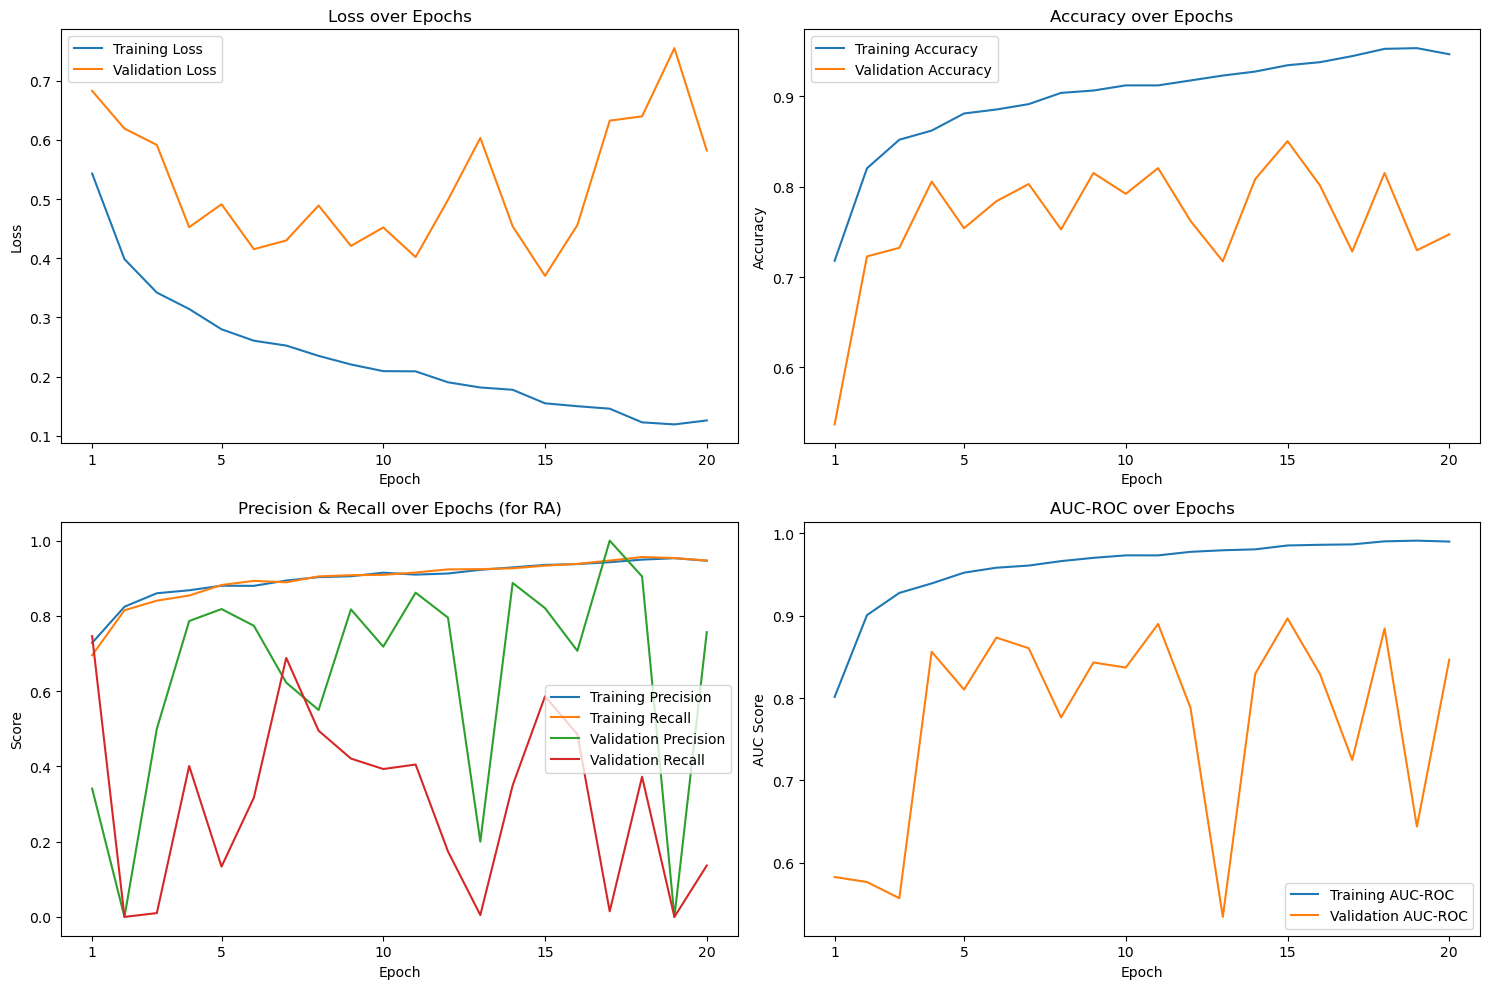

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assuming history_df is already loaded
# history_df = pd.read_csv(history_file_path)

plt.figure(figsize=(15, 10))

# Define your custom tick positions
custom_ticks = [1, 5, 10, 15, 20] # Your desired x-axis values

# Get the total number of epochs (still good to know for context, even if not directly used in xticks)
total_epochs = len(history_df)
epochs = range(1, total_epochs + 1) # Full range of epochs for plotting the lines


# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, history_df['loss'], label='Training Loss')
plt.plot(epochs, history_df['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.xticks(custom_ticks) # Use the custom tick list

# Plot Accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs, history_df['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.xticks(custom_ticks)

# Plot Precision and Recall
plt.subplot(2, 2, 3)
plt.plot(epochs, history_df['precision'], label='Training Precision')
plt.plot(epochs, history_df['recall'], label='Training Recall')
plt.plot(epochs, history_df['val_precision'], label='Validation Precision')
plt.plot(epochs, history_df['val_recall'], label='Validation Recall')
plt.title('Precision & Recall over Epochs (for RA)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(False)
plt.xticks(custom_ticks)

# Plot AUC-ROC
plt.subplot(2, 2, 4)
plt.plot(epochs, history_df['auc_roc'], label='Training AUC-ROC')
plt.plot(epochs, history_df['val_auc_roc'], label='Validation AUC-ROC')
plt.title('AUC-ROC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
plt.legend()
plt.grid(False)
plt.xticks(custom_ticks)

plt.tight_layout()
plt.show()
# plt.savefig(os.path.join(MODELS_DIR, 'training_curves.png'))

Found 3886 images belonging to 2 classes.
Found 764 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


2025-06-26 23:59:48.740933: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


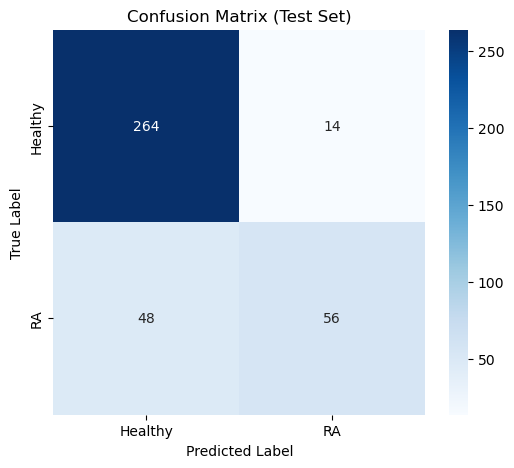

In [22]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
import seaborn as sns # For heatmap

# Assuming you have test_generator from a data_loader run
# You might need to rerun data_loader_transfer.py to get test_generator
from src.data_loader_transfer import get_image_data_generators
_, _, test_generator = get_image_data_generators()

# Load the best model
best_model = tf.keras.models.load_model(model_file_path)

# Make predictions (y_pred_probs are probabilities from 0 to 1)
y_pred_probs = best_model.predict(test_generator)
y_pred_binary = (y_pred_probs > 0.5).astype(int) # Apply threshold

# Get true labels (assuming test_generator.classes is available or you manually load labels)
test_generator.reset() # Reset if it's already been iterated
y_true = test_generator.classes

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'RA'], yticklabels=['Healthy', 'RA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# (You already calculate F1-Score and Specificity in train_transfer.py,
# so you could just display those from the console output or store them in a summary file.)

Added '/Users/patriciawatanabe/Projects/RA_classification_CNN' to sys.path.
Current working directory: /Users/patriciawatanabe/Projects/RA_classification_CNN/notebooks

Attempting to load history from: /Users/patriciawatanabe/Projects/RA_classification_CNN/models/training_history_transfer.csv
Attempting to load model from: /Users/patriciawatanabe/Projects/RA_classification_CNN/models/ra_classifier_transfer_cnn.h5
Training history loaded successfully.

History DataFrame Head:
       loss  accuracy  precision    recall   auc_roc  val_loss  val_accuracy  \
0  0.543088  0.717955   0.728261  0.695381  0.801356  0.682787      0.536685   
1  0.398422  0.820446   0.824423  0.815026  0.900800  0.619103      0.722826   
2  0.341913  0.852102   0.860181  0.840519  0.927738  0.591432      0.732337   
3  0.314166  0.862221   0.868074  0.854102  0.939275  0.452474      0.805707   
4  0.279875  0.881162   0.880249  0.882078  0.952372  0.491224      0.754076   

   val_precision  val_recall  val_auc_r

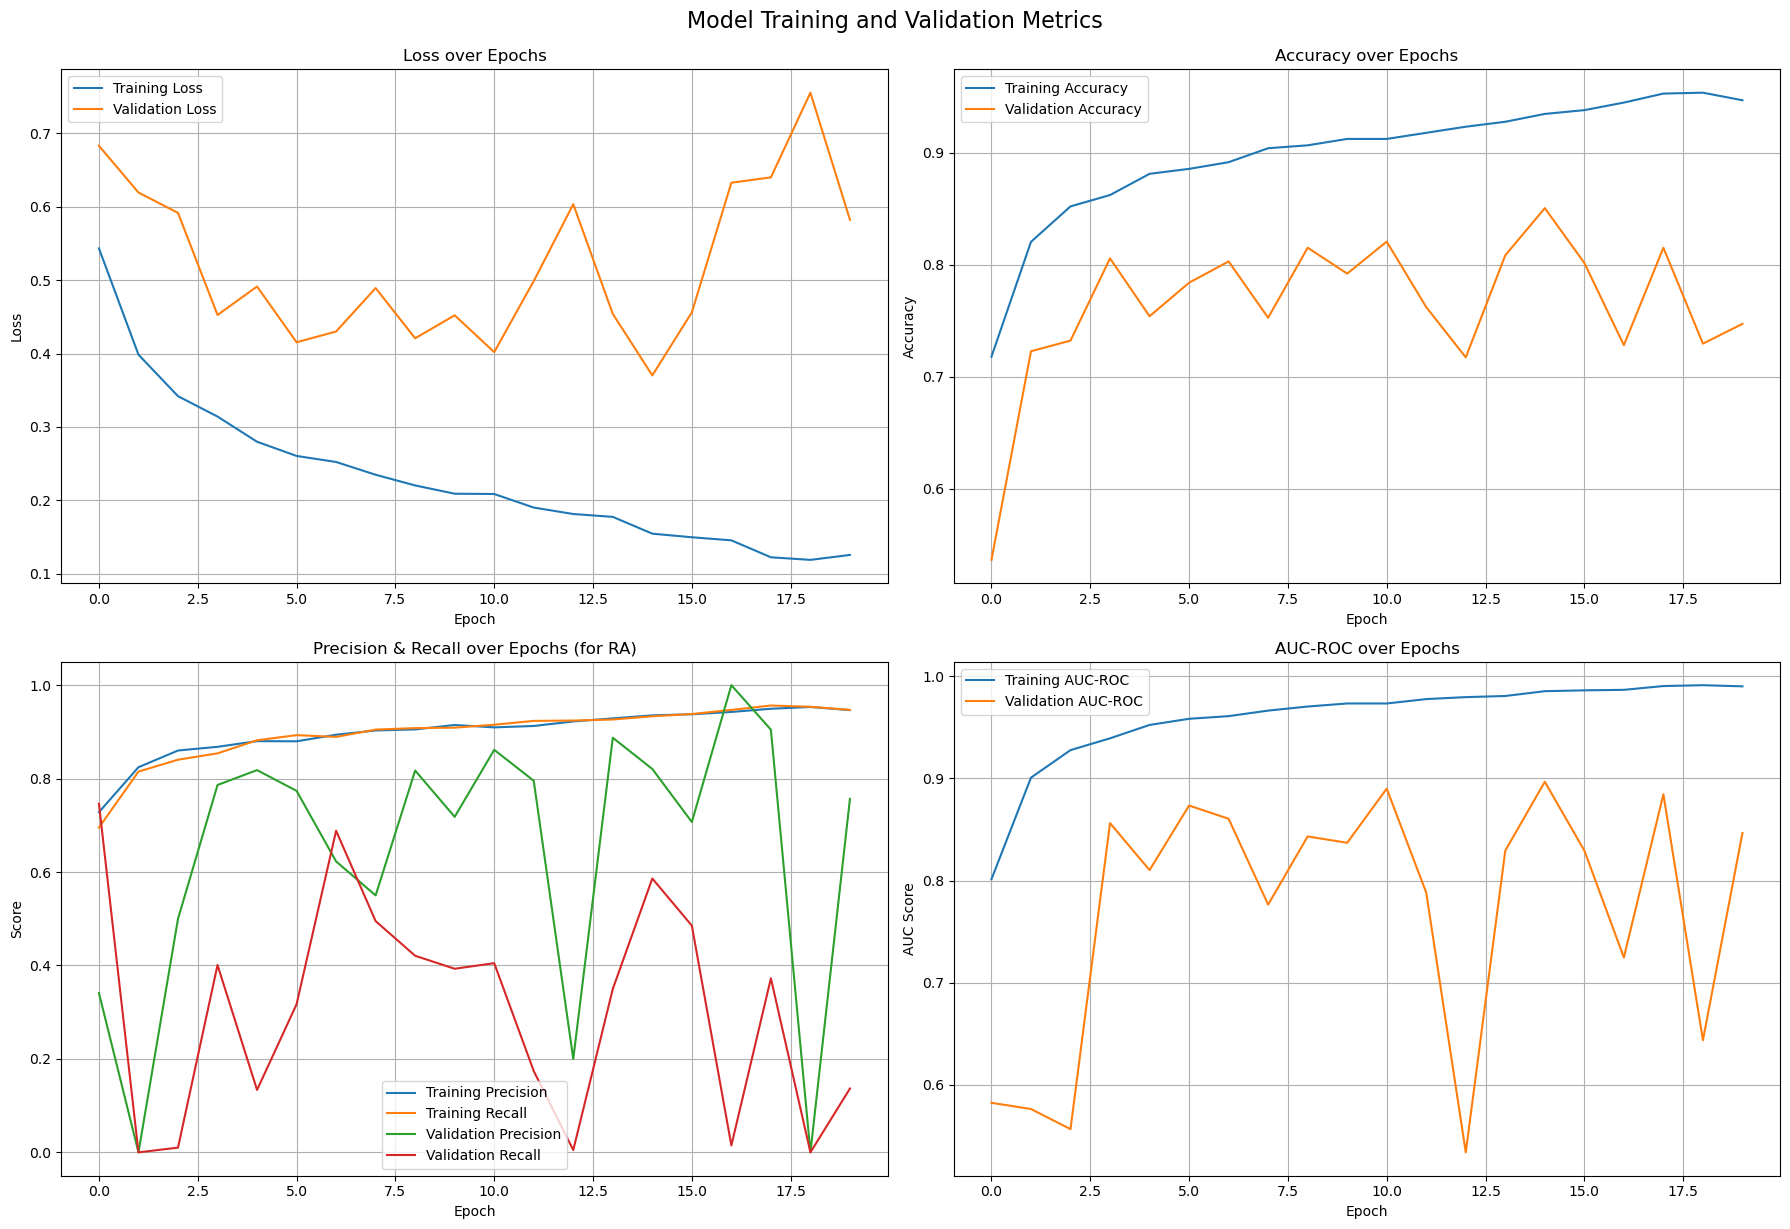


--- Preparing Test Data and Loading Best Model ---
Found 3886 images belonging to 2 classes.
Found 764 images belonging to 2 classes.
Found 382 images belonging to 2 classes.
Test Generator Ready: 382 samples found.
Best model loaded successfully.

--- Generating Confusion Matrix ---


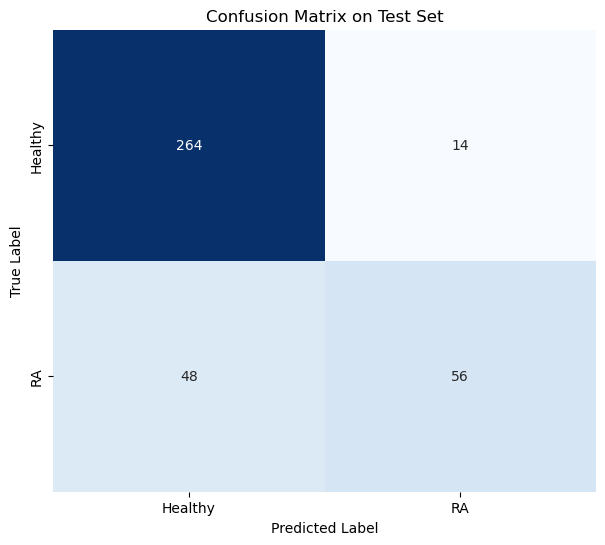


--- Generating ROC Curve ---


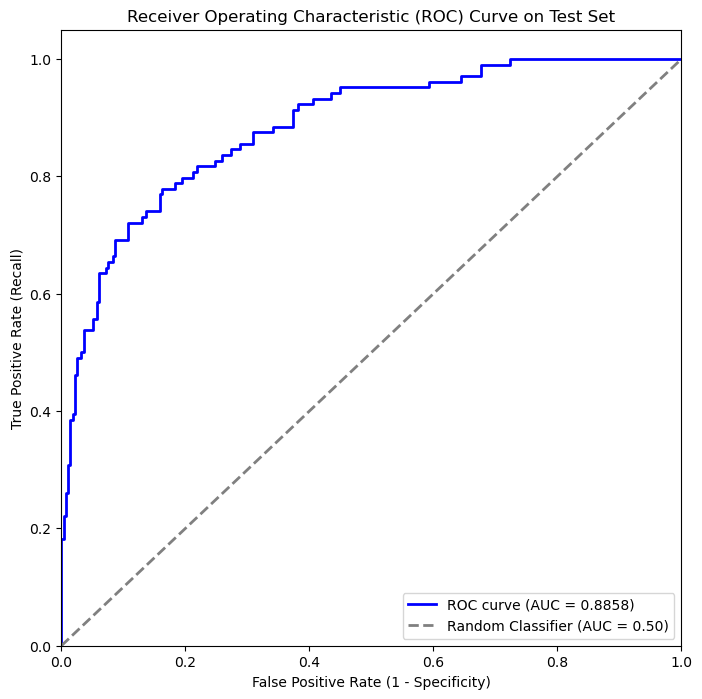


--- Generating Precision-Recall Curve ---


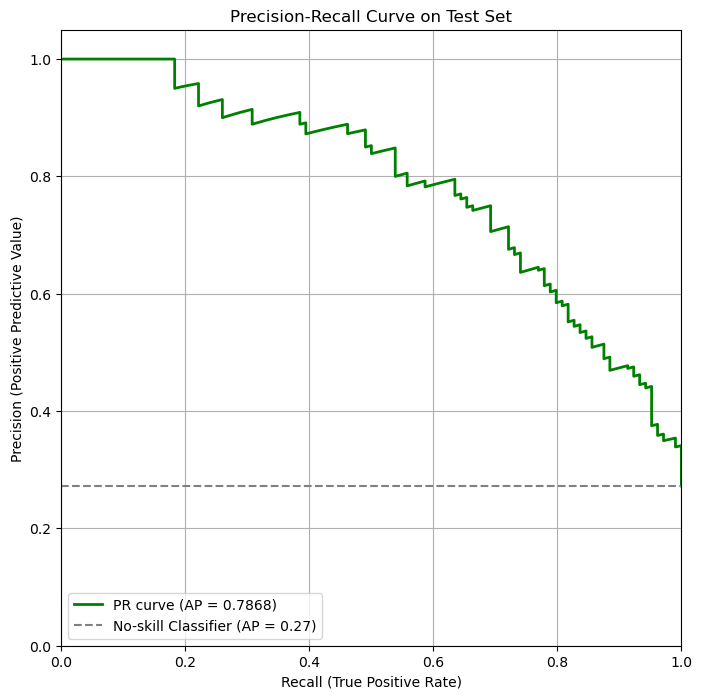


All plotting attempts completed.


In [17]:
# Cell 1: Setup - Add project root to path and import basic modules

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score

# Get the current working directory of the notebook (e.g., .../RA_classification_CNN/notebooks)
notebook_dir = os.getcwd()

# Assume the project root is one level up from the notebooks directory
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the project root to Python's system path
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Added '{project_root}' to sys.path.")
print(f"Current working directory: {notebook_dir}")

# Ensure the models directory exists, as plots will be saved there potentially
models_dir_path = os.path.join(project_root, 'models')
os.makedirs(models_dir_path, exist_ok=True)


# Cell 2: Import project-specific configurations and data loader

# Import necessary components from your project files
# Adjust these imports if you placed config_transfer.py or data_loader_transfer.py elsewhere
from src.config_transfer import MODELS_DIR, HISTORY_NAME, MODEL_NAME, CLASS_NAMES
from src.data_loader_transfer import get_image_data_generators

# --- Paths to your saved data and model ---
# These paths are now relative to the project_root, not the notebook_dir directly
history_file_path = os.path.join(project_root, MODELS_DIR, HISTORY_NAME)
model_file_path = os.path.join(project_root, MODELS_DIR, MODEL_NAME)

print(f"\nAttempting to load history from: {history_file_path}")
print(f"Attempting to load model from: {model_file_path}")


# Cell 3: Load Training History

try:
    history_df = pd.read_csv(history_file_path)
    print("Training history loaded successfully.")
    print("\nHistory DataFrame Head:")
    print(history_df.head())
except FileNotFoundError:
    print(f"Error: History file not found at {history_file_path}. Please ensure training has completed and the file exists.")
    # You might want to exit or raise an error here if the history is crucial
    raise # Re-raise the error to stop execution if file is not found
except Exception as e:
    print(f"An unexpected error occurred while loading history: {e}")
    raise


# Cell 4: Plot Training and Validation Curves

print("\n--- Generating Training/Validation Curves ---")
plt.figure(figsize=(18, 12)) # Adjust figure size for better visualization

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(2, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Precision and Recall
plt.subplot(2, 2, 3)
plt.plot(history_df['precision'], label='Training Precision')
plt.plot(history_df['recall'], label='Training Recall')
plt.plot(history_df['val_precision'], label='Validation Precision')
plt.plot(history_df['val_recall'], label='Validation Recall')
plt.title('Precision & Recall over Epochs (for RA)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Plot AUC-ROC
plt.subplot(2, 2, 4)
plt.plot(history_df['auc_roc'], label='Training AUC-ROC')
plt.plot(history_df['val_auc_roc'], label='Validation AUC-ROC')
plt.title('AUC-ROC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle('Model Training and Validation Metrics', y=1.02, fontsize=16)
plt.show()


# Cell 5: Prepare Test Data and Load Best Model for Evaluation Metrics

print("\n--- Preparing Test Data and Loading Best Model ---")
try:
    # Get generators (only test_generator is needed here)
    # This will use the logic in data_loader_transfer.py to set up generators
    # It will be fast if data/processed_transfer is already populated
    _, _, test_generator = get_image_data_generators()
    print(f"Test Generator Ready: {test_generator.samples} samples found.")

    # Load the best model
    best_model = tf.keras.models.load_model(model_file_path)
    print("Best model loaded successfully.")

    # Get true labels and predicted probabilities
    test_generator.reset() # Important to reset generator before making predictions
    y_true = test_generator.classes # Actual integer labels (0 or 1)
    y_pred_probs = best_model.predict(test_generator) # Predicted probabilities (0 to 1)

    # Convert probabilities to binary predictions using a threshold (default 0.5)
    y_pred_binary = (y_pred_probs > 0.5).astype(int)


except Exception as e:
    print(f"\nAn error occurred during test data preparation or model loading: {e}")
    traceback.print_exc() # Print full traceback for debugging
    raise # Re-raise the error to stop execution


# Cell 6: Plot Confusion Matrix

print("\n--- Generating Confusion Matrix ---")
try:
    cm = confusion_matrix(y_true, y_pred_binary)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix on Test Set')
    plt.show()
except Exception as e:
    print(f"Error generating Confusion Matrix: {e}")
    traceback.print_exc()


# Cell 7: Plot ROC Curve

print("\n--- Generating ROC Curve ---")
try:
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    auc_roc_score = auc(fpr, tpr) # Calculate AUC from the curve

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
except Exception as e:
    print(f"Error generating ROC Curve: {e}")
    traceback.print_exc()


# Cell 8: Plot Precision-Recall Curve

print("\n--- Generating Precision-Recall Curve ---")
try:
    precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
    avg_precision_score = average_precision_score(y_true, y_pred_probs) # Calculate AP score

    plt.figure(figsize=(8, 8))
    plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision_score:.4f})')
    # Baseline for PR curve is the proportion of the positive class (RA)
    baseline = np.sum(y_true == 1) / len(y_true)
    plt.plot([0, 1], [baseline, baseline], color='gray', linestyle='--', label=f'No-skill Classifier (AP = {baseline:.2f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (True Positive Rate)')
    plt.ylabel('Precision (Positive Predictive Value)')
    plt.title('Precision-Recall Curve on Test Set')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"Error generating Precision-Recall Curve: {e}")
    traceback.print_exc()


print("\nAll plotting attempts completed.")

data.csv loaded successfully.
DataFrame Head:
   exam_number gender  age  score_avg
0       316153      F   77       28.5
1       348913      M   62       25.5
2       323584      F   48       92.0
3       172637      F   52      122.5
4        98316      M   36        1.0

--- Generating Histograms ---


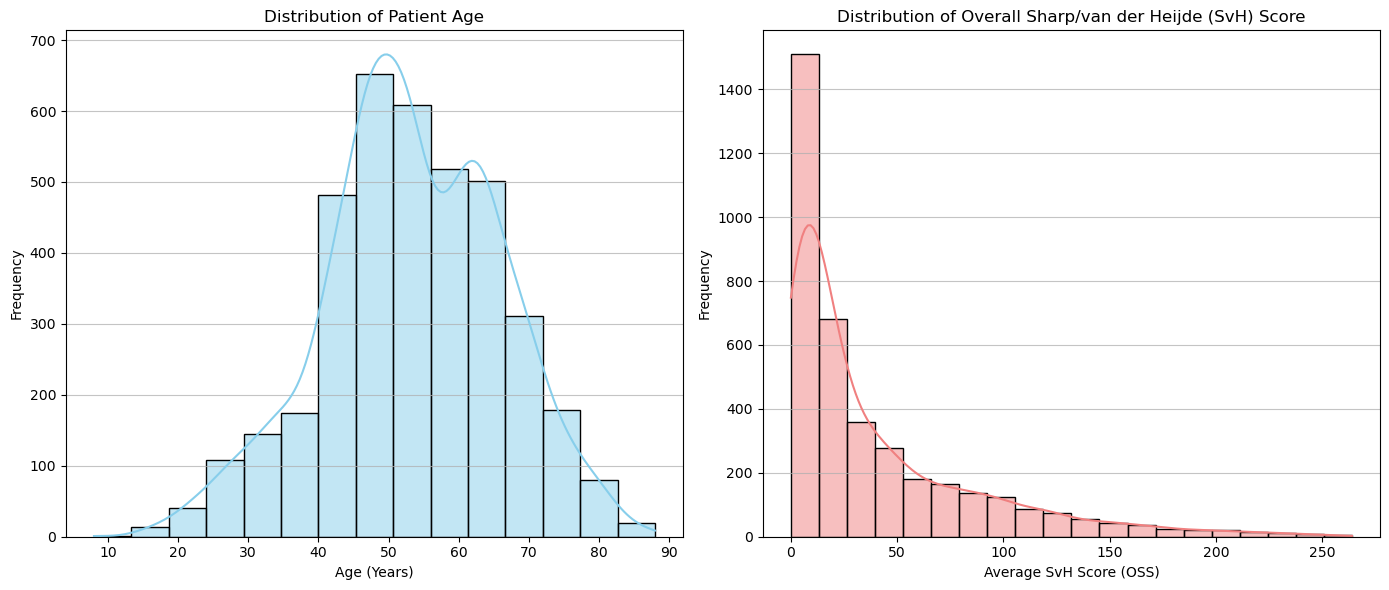


Histograms generated.


In [18]:
# Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For nicer plots, if desired
import os

# Cell 2: Load the Data
# Assuming your data.csv is in the same directory as your notebook,
# or in the project root if the notebook is in 'notebooks/'
# Adjust the path as needed
try:
    # If notebook is in RA_classification_CNN/notebooks/
    data_path = os.path.join('..', 'data', 'raw', 'data.csv')
    df = pd.read_csv(data_path)
    print("data.csv loaded successfully.")
    print("DataFrame Head:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: data.csv not found at {data_path}. Please adjust the path.")
    # If the notebook is directly in RA_classification_CNN/ (project root)
    try:
        data_path = os.path.join('data', 'raw', 'data.csv')
        df = pd.read_csv(data_path)
        print("data.csv loaded successfully from project root.")
        print("DataFrame Head:")
        print(df.head())
    except FileNotFoundError:
        print("Error: data.csv not found in typical locations. Please specify the correct path.")
        raise # Re-raise error if not found


# Cell 3: Plot Histograms

print("\n--- Generating Histograms ---")

plt.figure(figsize=(14, 6))

# Histogram for Age Distribution
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['age'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for SvH Score Average (score_avg) Distribution
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df['score_avg'], kde=True, bins=20, color='lightcoral')
plt.title('Distribution of Overall Sharp/van der Heijde (SvH) Score')
plt.xlabel('Average SvH Score (OSS)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

print("\nHistograms generated.")

data.csv loaded successfully.
DataFrame Head:
   exam_number gender  age  score_avg
0       316153      F   77       28.5
1       348913      M   62       25.5
2       323584      F   48       92.0
3       172637      F   52      122.5
4        98316      M   36        1.0

--- Generating Histograms Separated by Gender ---


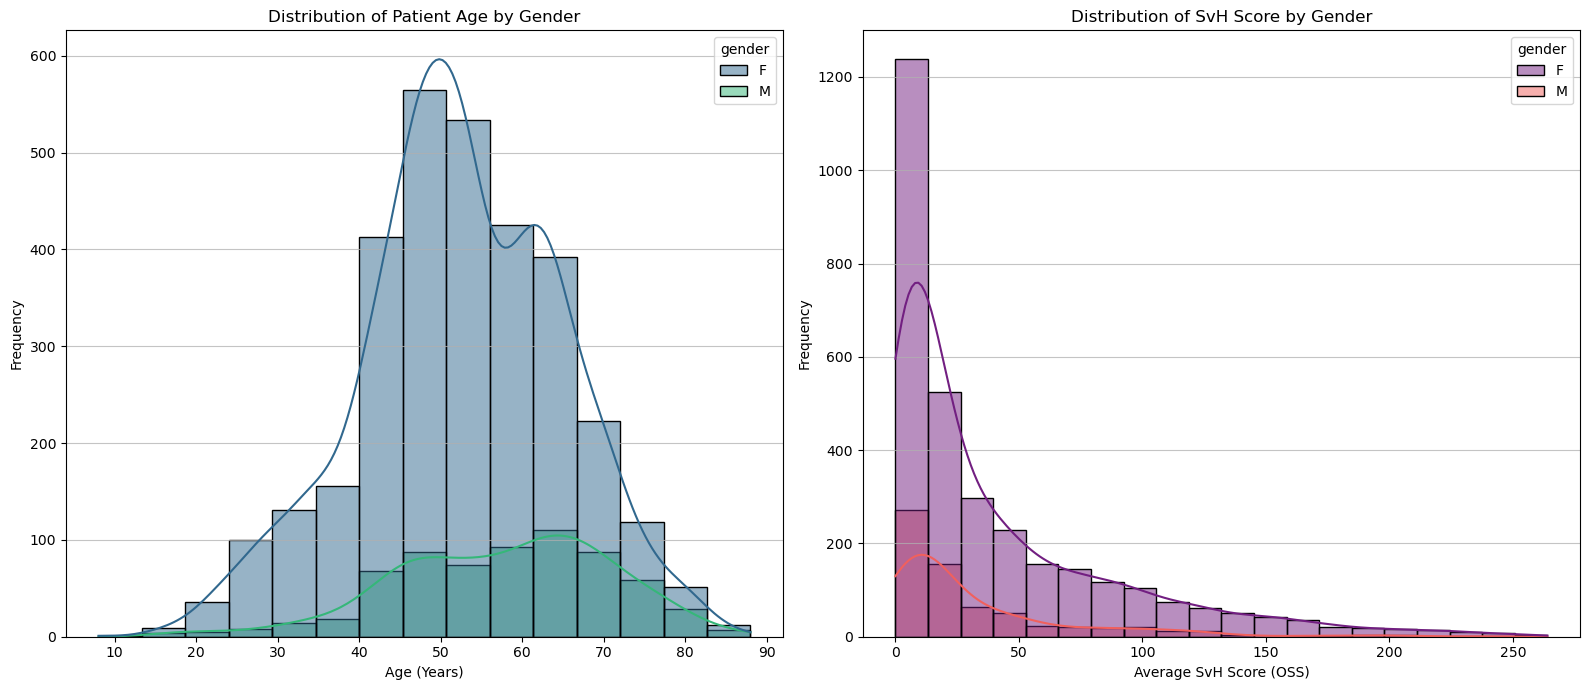


Histograms per gender generated.


In [19]:
# Cell 1: Import Libraries (Same as before)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is imported
import os

# Cell 2: Load the Data (Same as before)
# Adjust the path as needed
try:
    data_path = os.path.join('..', 'data', 'raw', 'data.csv')
    df = pd.read_csv(data_path)
    print("data.csv loaded successfully.")
    print("DataFrame Head:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: data.csv not found at {data_path}. Please adjust the path.")
    try:
        data_path = os.path.join('data', 'raw', 'data.csv')
        df = pd.read_csv(data_path)
        print("data.csv loaded successfully from project root.")
        print("DataFrame Head:")
        print(df.head())
    except FileNotFoundError:
        print("Error: data.csv not found in typical locations. Please specify the correct path.")
        raise


# Cell 3: Plot Histograms Separated by Gender

print("\n--- Generating Histograms Separated by Gender ---")

plt.figure(figsize=(16, 7)) # Adjust figure size for better visualization

# Histogram for Age Distribution per Gender
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(data=df, x='age', hue='gender', kde=True, bins=15, palette='viridis')
plt.title('Distribution of Patient Age by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for SvH Score Average (score_avg) Distribution per Gender
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(data=df, x='score_avg', hue='gender', kde=True, bins=20, palette='magma')
plt.title('Distribution of SvH Score by Gender')
plt.xlabel('Average SvH Score (OSS)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

print("\nHistograms per gender generated.")

data.csv loaded successfully.
DataFrame Head:
   exam_number gender  age  score_avg
0       316153      F   77       28.5
1       348913      M   62       25.5
2       323584      F   48       92.0
3       172637      F   52      122.5
4        98316      M   36        1.0

--- Mapping Gender Labels ---
Gender labels mapped. DataFrame Head with new column:
   exam_number gender  age  score_avg gender_labeled
0       316153      F   77       28.5         Female
1       348913      M   62       25.5           Male
2       323584      F   48       92.0         Female
3       172637      F   52      122.5         Female
4        98316      M   36        1.0           Male

--- Generating Histograms Separated by Labeled Gender ---


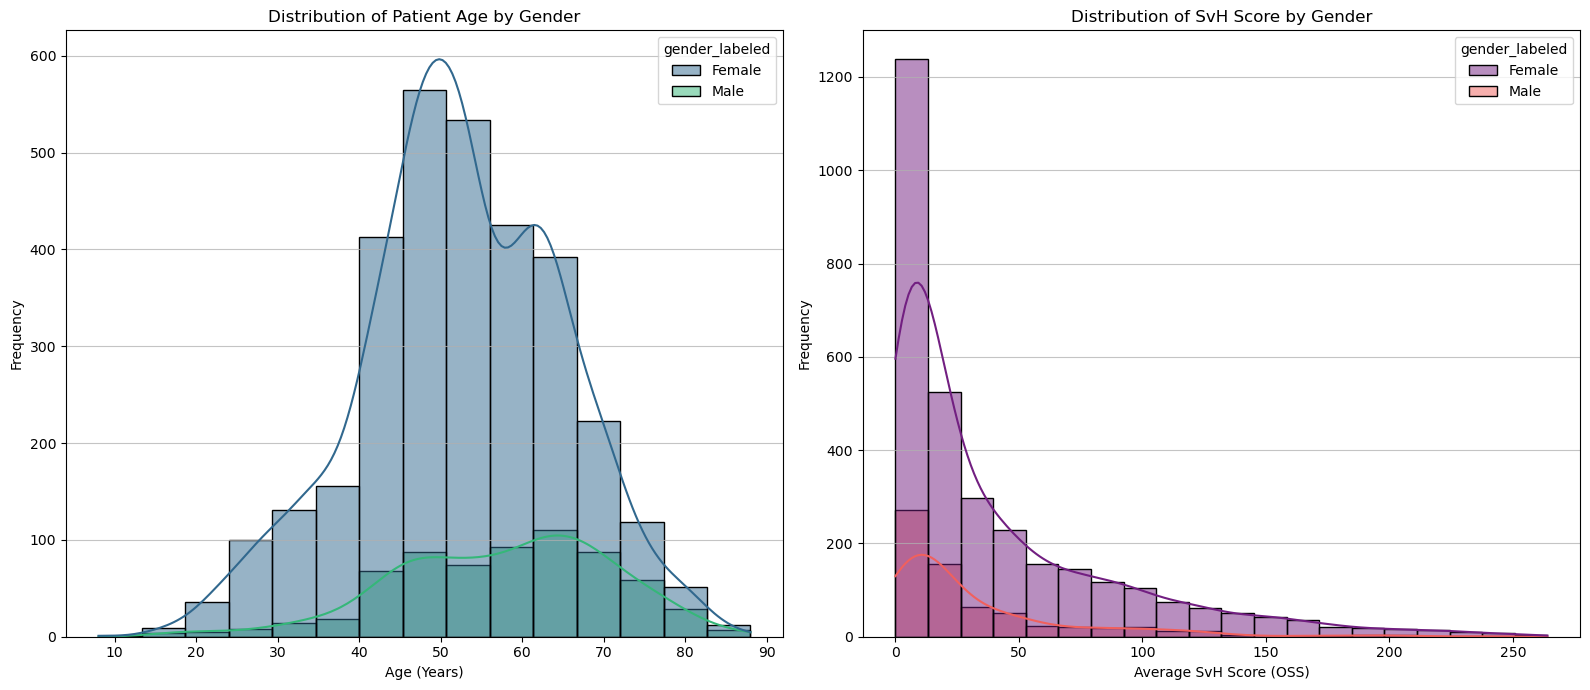


Histograms per gender generated with specific captions.


In [20]:
# Cell 1: Import Libraries (Same as before)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cell 2: Load the Data (Same as before)
# Adjust the path as needed
try:
    data_path = os.path.join('..', 'data', 'raw', 'data.csv')
    df = pd.read_csv(data_path)
    print("data.csv loaded successfully.")
    print("DataFrame Head:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: data.csv not found at {data_path}. Please adjust the path.")
    try:
        data_path = os.path.join('data', 'raw', 'data.csv')
        df = pd.read_csv(data_path)
        print("data.csv loaded successfully from project root.")
        print("DataFrame Head:")
        print(df.head())
    except FileNotFoundError:
        print("Error: data.csv not found in typical locations. Please specify the correct path.")
        raise


# Cell 3: Map Gender Labels (NEW)
print("\n--- Mapping Gender Labels ---")
gender_mapping = {'F': 'Female', 'M': 'Male'}
df['gender_labeled'] = df['gender'].map(gender_mapping)
print("Gender labels mapped. DataFrame Head with new column:")
print(df.head())


# Cell 4: Plot Histograms Separated by Labeled Gender

print("\n--- Generating Histograms Separated by Labeled Gender ---")

plt.figure(figsize=(16, 7))

# Histogram for Age Distribution per Labeled Gender
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='gender_labeled', kde=True, bins=15, palette='viridis') # Use 'gender_labeled'
plt.title('Distribution of Patient Age by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for SvH Score Average (score_avg) Distribution per Labeled Gender
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='score_avg', hue='gender_labeled', kde=True, bins=20, palette='magma') # Use 'gender_labeled'
plt.title('Distribution of SvH Score by Gender')
plt.xlabel('Average SvH Score (OSS)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

print("\nHistograms per gender generated with specific captions.")